In [1]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np

%cd "C:\Users\JHARE\Documents\GitHub\turbulence_tracing\particle_tracking"
import polarisation_ray_transfer_matrix as rt
import particle_tracker as pt

C:\Users\JHARE\Documents\GitHub\turbulence_tracing\particle_tracking


In [2]:
N_V = 100
M_V = 2*N_V+1
ne_extent = 5.0e-3
ne_x = np.linspace(-ne_extent,ne_extent,M_V)
ne_y = np.linspace(-ne_extent,ne_extent,M_V)
ne_z = np.linspace(-ne_extent,ne_extent,M_V)

## Incoherent

Incoherent
Ray trace completed in:	 290.04388546943665 s


<IPython.core.display.Javascript object>


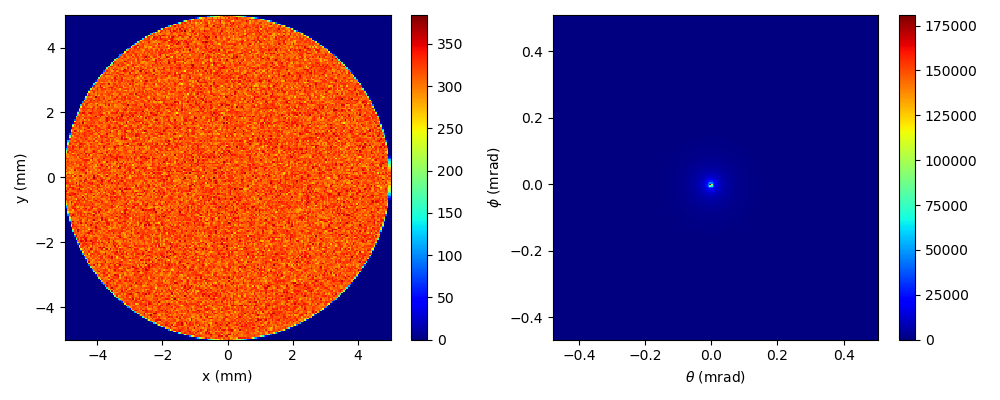

In [46]:
ripple_ic = pt.ElectronCube(ne_x, ne_y, ne_z, ne_extent, B_on = False, inv_brems = False, phaseshift = False, probing_direction = 'z')
r = ripple_ic

s=4*1e-3
n_e0=2e23
Ly=1e-3

r.ne = 0*r.XX#n_e0*10**(r.XX/s)*(1+np.cos(2*np.pi*r.YY/Ly))
r.calc_dndr()
r.set_up_interps()

## Initialise rays and solve
N_rays = int(1e7)
s0 = pt.init_beam(Np = N_rays, beam_size=5e-3, divergence = 0.1e-3, ne_extent = ne_extent, coherent = False)
r.solve(s0)
rf = r.rf

## Plot ray location and angle at output to density cube
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
nbins = 201
_,_,_,im1 = ax1.hist2d(rf[0]*1e3, rf[2]*1e3, bins=(nbins, nbins), cmap=plt.cm.jet);
plt.colorbar(im1,ax=ax1)
ax1.set_xlabel("x (mm)")
ax1.set_ylabel("y (mm)")
_,_,_,im2 = ax2.hist2d(rf[1]*1e3, rf[3]*1e3, bins=(nbins, nbins), cmap=plt.cm.jet);
plt.colorbar(im2,ax=ax2)
ax2.set_xlabel(r"$\theta$ (mrad)")
ax2.set_ylabel(r"$\phi$ (mrad)")

fig.tight_layout()

## Coherent

Ray trace completed in:	 534.2756390571594 s


<IPython.core.display.Javascript object>


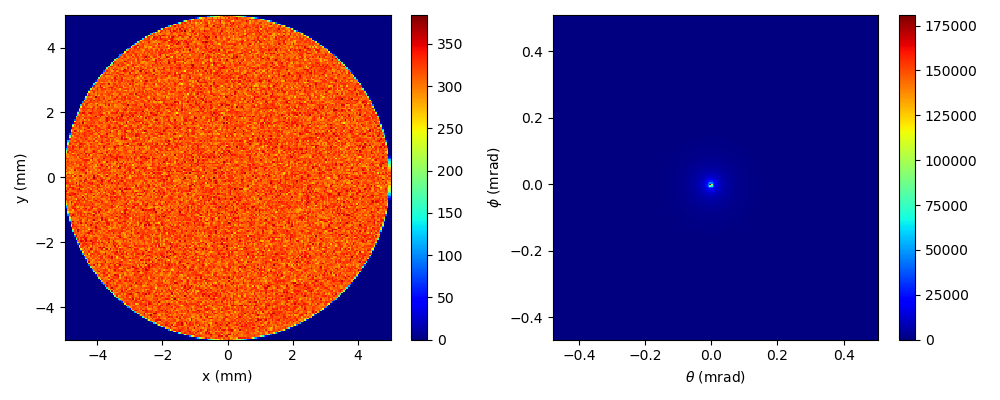

In [47]:
ripple_c = pt.ElectronCube(ne_x, ne_y, ne_z, ne_extent, B_on = False, inv_brems = False, phaseshift = False, probing_direction = 'z')
r = ripple_c

s=4*1e-3
n_e0=2e23
Ly=1e-3

r.ne = 0*r.XX#n_e0*10**(r.XX/s)*(1+np.cos(2*np.pi*r.YY/Ly))
r.calc_dndr()
r.set_up_interps()

## reuse s0, but with a uniform
s0[7,:] = 0

r.solve(s0)
rf = r.rf

## Plot ray location and angle at output to density cube
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
nbins = 201
_,_,_,im1 = ax1.hist2d(rf[0]*1e3, rf[2]*1e3, bins=(nbins, nbins), cmap=plt.cm.jet);
plt.colorbar(im1,ax=ax1)
ax1.set_xlabel("x (mm)")
ax1.set_ylabel("y (mm)")
_,_,_,im2 = ax2.hist2d(rf[1]*1e3, rf[3]*1e3, bins=(nbins, nbins), cmap=plt.cm.jet);
plt.colorbar(im2,ax=ax2)
ax2.set_xlabel(r"$\theta$ (mrad)")
ax2.set_ylabel(r"$\phi$ (mrad)")

fig.tight_layout()

<IPython.core.display.Javascript object>


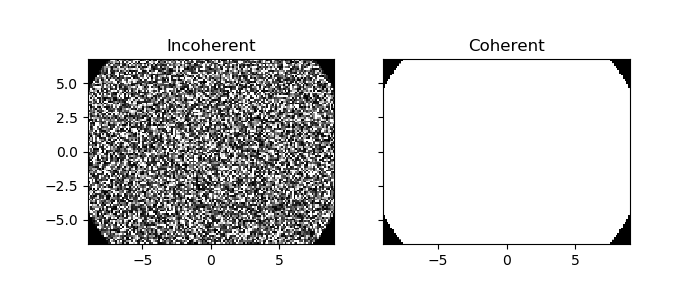

Text(0.5, 1.0, 'Coherent')

In [61]:
fig, axs = plt.subplots(1,2, figsize=(7, 3), sharex = True, sharey = True)

cm='gray'

clim = [0,1000]

r = ripple_ic
r.r0 = np.zeros((6, N_rays), dtype = 'complex')
r.r0[:4,:] = r.rf
r.r0[4:,:] = r.Jf
r.r0[0,:] *=1e3 #we use mm not m for the ray tracer
r.r0[2,:] *=1e3

s_ic = rt.Shadowgraphy(r.r0, L = 400, R = 25, focal_plane = 0)
s = s_ic
s.solve()
s.histogram(bin_scale = 25)
s.plot(axs[0], clim=clim, cmap=cm)
axs[0].set_title('Incoherent')

r = ripple_c
r.r0 = np.zeros((6, N_rays), dtype = 'complex')
r.r0[:4,:] = r.rf
r.r0[4:,:] = r.Jf
r.r0[0,:] *=1e3 #we use mm not m for the ray tracer
r.r0[2,:] *=1e3

s_c = rt.Shadowgraphy(r.r0, L = 400, R = 25, focal_plane = 0)
s = s_c
s.solve()
s.histogram(bin_scale = 25)
s.plot(axs[1], clim=clim, cmap=cm)
axs[1].set_title('Coherent')

<IPython.core.display.Javascript object>


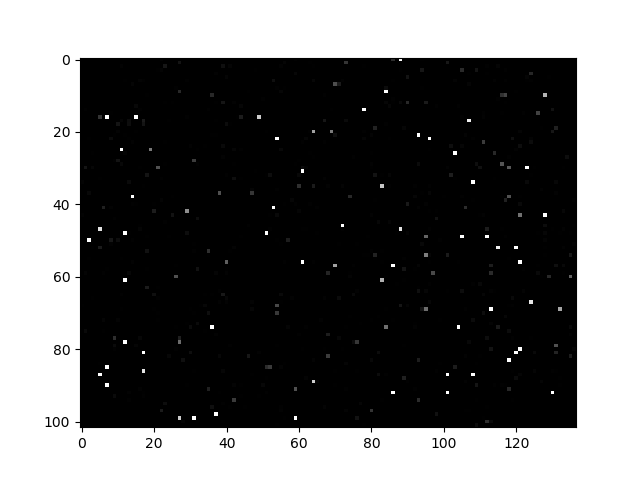

In [54]:
fig, ax = plt.subplots()

N = s_c.H/(s_ic.H+1e-4)**2

ax.imshow(N, cmap = 'gray', clim = [0,1e5])

In [55]:
N.mean(), N.std()

(639098.5955530041, 62558917.175446406)

In [59]:
s_c.H[20:-20,20:-20].mean(), s_c.H[20:-20,20:-20].std(), s_c.H[20:-20,20:-20].std()/s_c.H[20:-20,20:-20].mean()

(307199.9845360825, 25786.71368098647, 0.08394112948907934)

In [60]:
s_ic.H[20:-20,20:-20].mean(), s_ic.H[20:-20,20:-20].std(), s_ic.H[20:-20,20:-20].std()/s_ic.H[20:-20,20:-20].mean()

(560.3801913520383, 562.4986885324519, 1.0037804640726187)

<IPython.core.display.Javascript object>


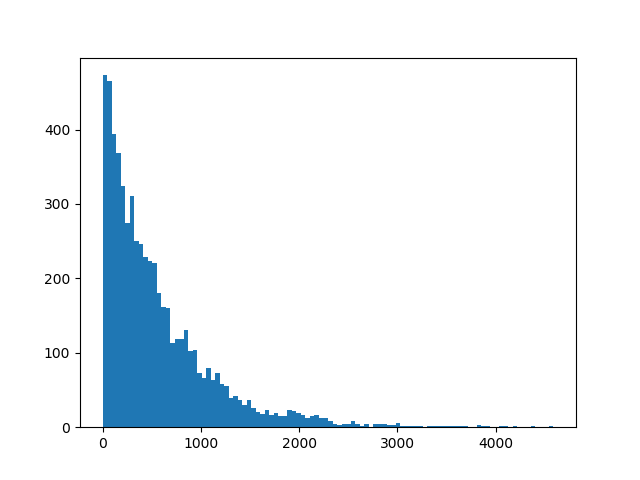

(array([473., 465., 394., 368., 324., 275., 311., 250., 246., 229., 223.,
        220., 181., 162., 160., 113., 119., 118., 131., 103., 104.,  73.,
         66.,  79.,  63.,  73.,  58.,  56.,  39.,  42.,  37.,  30.,  36.,
         26.,  21.,  18.,  23.,  16.,  19.,  15.,  15.,  23.,  22.,  19.,
         16.,  12.,  15.,  16.,  12.,  13.,   8.,   4.,   3.,   4.,   4.,
          8.,   4.,   2.,   4.,   0.,   4.,   4.,   4.,   3.,   3.,   6.,
          1.,   2.,   2.,   1.,   1.,   0.,   1.,   1.,   1.,   2.,   1.,
          1.,   1.,   1.,   1.,   0.,   0.,   3.,   1.,   1.,   0.,   0.,
          1.,   1.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          1.]),
 array([4.49096732e-02, 4.59392826e+01, 9.18336556e+01, 1.37728029e+02,
        1.83622401e+02, 2.29516774e+02, 2.75411147e+02, 3.21305520e+02,
        3.67199893e+02, 4.13094266e+02, 4.58988639e+02, 5.04883012e+02,
        5.50777385e+02, 5.96671758e+02, 6.42566131e+02, 6.88460504e+02,
        7.34354877e+02, 7.8024

In [67]:
fig, ax = plt.subplots()
ax.hist(s_ic.H[20:-20,20:-20].flatten(), bins = 100)

<IPython.core.display.Javascript object>


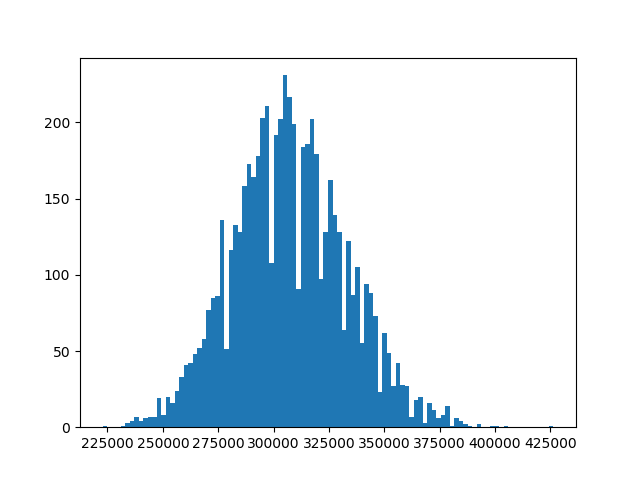

(array([  1.,   0.,   0.,   0.,   1.,   3.,   4.,   7.,   4.,   6.,   7.,
          7.,  19.,   8.,  20.,  16.,  24.,  33.,  41.,  42.,  48.,  52.,
         58.,  77.,  85.,  86., 136.,  51., 116., 133., 128., 158., 173.,
        164., 178., 203., 211., 108., 192., 202., 231., 217., 199.,  91.,
        184., 186., 202., 179.,  97., 128., 162., 139., 128.,  64., 122.,
         87., 105.,  55.,  94.,  88.,  73.,  23.,  62.,  49.,  27.,  42.,
         28.,  27.,   7.,  18.,  20.,   3.,  16.,  11.,   6.,   8.,  14.,
          1.,   6.,   4.,   2.,   1.,   0.,   2.,   0.,   0.,   1.,   1.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([222784.  , 224820.25, 226856.5 , 228892.75, 230929.  , 232965.25,
        235001.5 , 237037.75, 239074.  , 241110.25, 243146.5 , 245182.75,
        247219.  , 249255.25, 251291.5 , 253327.75, 255364.  , 257400.25,
        259436.5 , 261472.75, 263509.  , 265545.25, 267581.5 , 269617.75,
        271654.  , 273

In [68]:
fig, ax = plt.subplots()
ax.hist(s_c.H[20:-20,20:-20].flatten(), bins = 100)

<IPython.core.display.Javascript object>


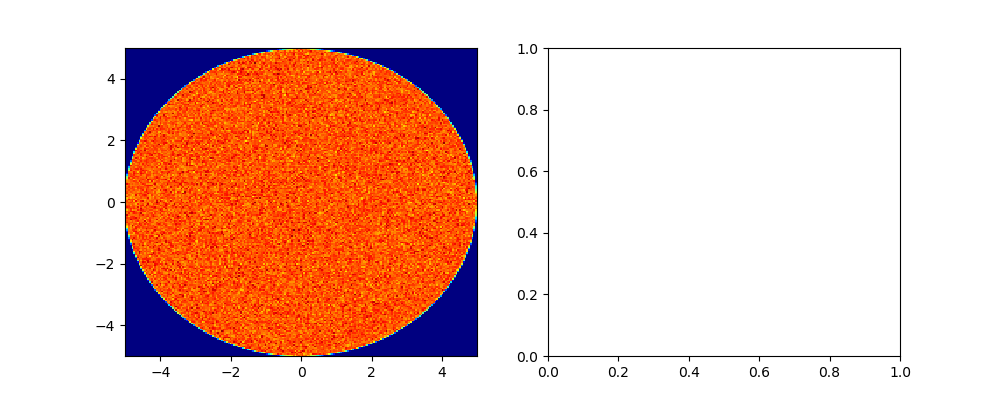

In [70]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
nbins = 201
h,_,_,im1 = ax1.hist2d(rf[0]*1e3, rf[2]*1e3, bins=(nbins, nbins), cmap=plt.cm.jet);

<IPython.core.display.Javascript object>


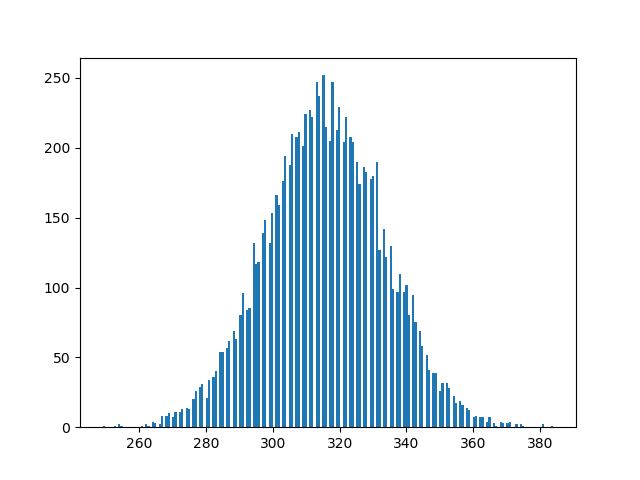

(array([  1.,   0.,   0.,   0.,   0.,   1.,   0.,   2.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   2.,   1.,   0.,
          4.,   3.,   0.,   2.,   8.,   0.,   8.,  10.,   0.,   7.,  11.,
          0.,  11.,  13.,   0.,  14.,  13.,   0.,  20.,  26.,   0.,  29.,
         31.,   0.,  21.,  34.,   0.,  36.,  40.,   0.,  54.,  54.,   0.,
         57.,  62.,   0.,  69.,  63.,   0.,  80.,  96.,   0.,  84.,  85.,
          0., 132., 117., 118.,   0., 139., 148.,   0., 132., 153.,   0.,
        166., 159.,   0., 176., 194.,   0., 188., 210.,   0., 208., 211.,
          0., 201., 224.,   0., 227., 222.,   0., 247., 237.,   0., 252.,
        215.,   0., 205., 247.,   0., 213., 229.,   0., 204., 222.,   0.,
        208., 204.,   0., 190., 174.,   0., 186., 183.,   0., 178., 180.,
          0., 190., 127.,   0., 142., 122.,   0., 130.,  99.,   0.,  97.,
        110.,   0.,  97., 102.,  80.,   0.,  95.,  75.,   0.,  69.,  58.,
          0.,  52.,  41.,   0.,  39., 

In [73]:
fig, ax = plt.subplots()
ax.hist(h[50:-50, 50:-50].flatten(), bins = 201)